DS 861 S25

Diabetes Prediction

Marcus Nogueira

This project uses a dataset of health-related measurements to build machine learning models that predict whether a patient is likely to have diabetes. We evaluate models such as Logistic Regression, Naive Bayes, and Linear Regression, and identify the most predictive features—like glucose, BMI, and age—that influence the outcome.

Link to presentation: https://youtu.be/OM44Vbp7cq4

Link to dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

1. Import Libraries


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

2. Load the Dataset

In [21]:
path = ('/Users/marcusnogueira/Library/Mobile Documents/com~apple~CloudDocs/861 S25/05_17/data2.csv')
df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMICategory,GlucoseInsulinRatio
0,6,148,72,35,0,33.6,0.627,50,1,Adult,Obese,0.000000
1,1,85,66,29,0,26.6,0.351,31,0,Adult,Overweight,0.000000
2,8,183,64,0,0,23.3,0.672,32,1,Adult,Normal,0.000000
3,1,89,66,23,94,28.1,0.167,21,0,Youth,Overweight,0.946809
4,0,137,40,35,168,43.1,2.288,33,1,Adult,Obese,0.815476


3. Preprocess Data

In [22]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
(df[['Insulin', 'SkinThickness']] == 0).sum()


for col in X.select_dtypes(include=['object', 'string']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMICategory,GlucoseInsulinRatio
0,6,148,72,35,0,33.6,0.627,50,1,Adult,Obese,0.000000
1,1,85,66,29,0,26.6,0.351,31,0,Adult,Overweight,0.000000
2,8,183,64,0,0,23.3,0.672,32,1,Adult,Normal,0.000000
3,1,89,66,23,94,28.1,0.167,21,0,Youth,Overweight,0.946809
4,0,137,40,35,168,43.1,2.288,33,1,Adult,Obese,0.815476


3.1 Correlation and Heatmap 

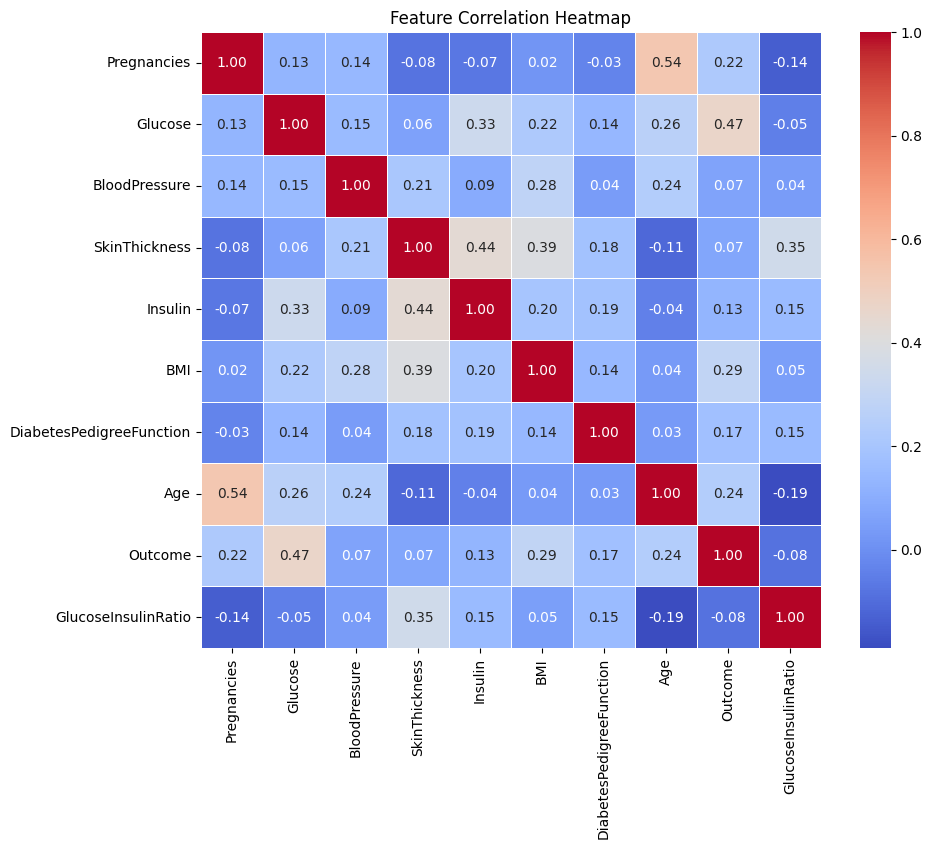

In [23]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


3.2  EDA

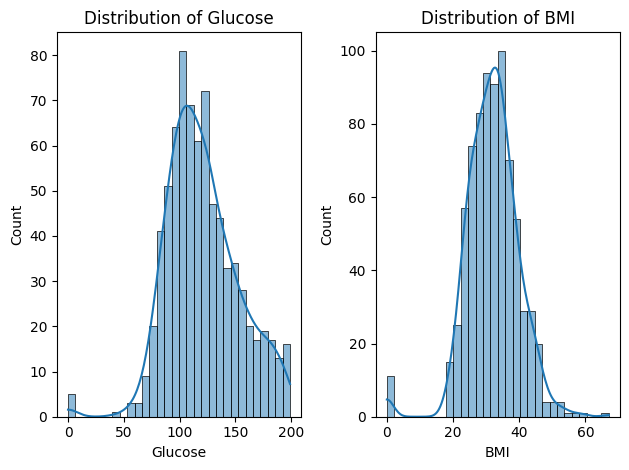

In [24]:

plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'], bins=30, kde=True)
plt.title('Distribution of Glucose')

plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Distribution of BMI')

plt.tight_layout()
plt.show()


I chose to analyze the distributions of Glucose and BMI because they emerged as the two most influential predictors in the model. Understanding their spread, skewness, and central tendencies helps validate assumptions about feature scaling, outlier presence, and class separation potential—making them critical for accurate prediction and model interpretation.

4. Train and Evaluate Models

In [25]:
results = {}

# Linear Regression (threshold at 0.5)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = (lr.predict(X_test) > 0.5).astype(int)
results['Linear Regression'] = accuracy_score(y_test, y_pred_lr)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
results['Logistic Regression'] = accuracy_score(y_test, y_pred_logreg)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results['SVM'] = accuracy_score(y_test, y_pred_svm)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = accuracy_score(y_test, y_pred_knn)

results

{'Linear Regression': 0.7597402597402597,
 'Logistic Regression': 0.7597402597402597,
 'Random Forest': 0.7467532467532467,
 'SVM': 0.7532467532467533,
 'KNN': 0.7012987012987013}

5. Compare Model Accuracies

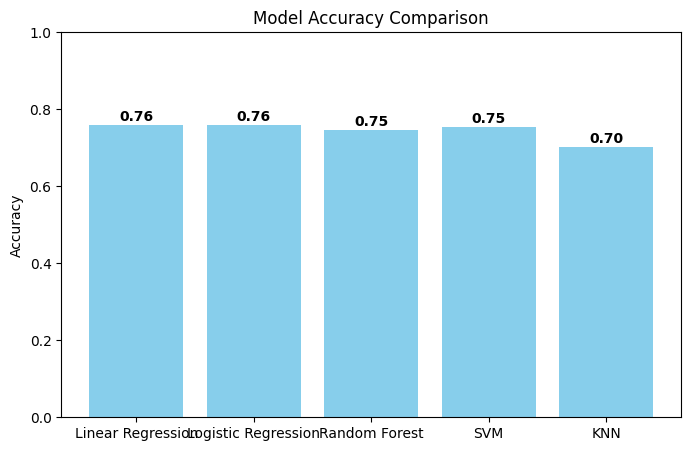

In [26]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontweight='bold')
plt.show()

6. Add Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
results['Naive Bayes'] = accuracy_score(y_test, y_pred_gnb)
results

{'Linear Regression': 0.7597402597402597,
 'Logistic Regression': 0.7597402597402597,
 'Random Forest': 0.7467532467532467,
 'SVM': 0.7532467532467533,
 'KNN': 0.7012987012987013,
 'Naive Bayes': 0.7207792207792207}

7. Add Decision Tree


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)
results

{'Linear Regression': 0.7597402597402597,
 'Logistic Regression': 0.7597402597402597,
 'Random Forest': 0.7467532467532467,
 'SVM': 0.7532467532467533,
 'KNN': 0.7012987012987013,
 'Naive Bayes': 0.7207792207792207,
 'Decision Tree': 0.7337662337662337}

8. Add Gradient Boosting Decision Tree

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(random_state=42)
gbdt.fit(X_train, y_train)
y_pred_gbdt = gbdt.predict(X_test)
results['Gradient Boosting'] = accuracy_score(y_test, y_pred_gbdt)
results

{'Linear Regression': 0.7597402597402597,
 'Logistic Regression': 0.7597402597402597,
 'Random Forest': 0.7467532467532467,
 'SVM': 0.7532467532467533,
 'KNN': 0.7012987012987013,
 'Naive Bayes': 0.7207792207792207,
 'Decision Tree': 0.7337662337662337,
 'Gradient Boosting': 0.7272727272727273}

9. Update the Accuracy Comparison Plot

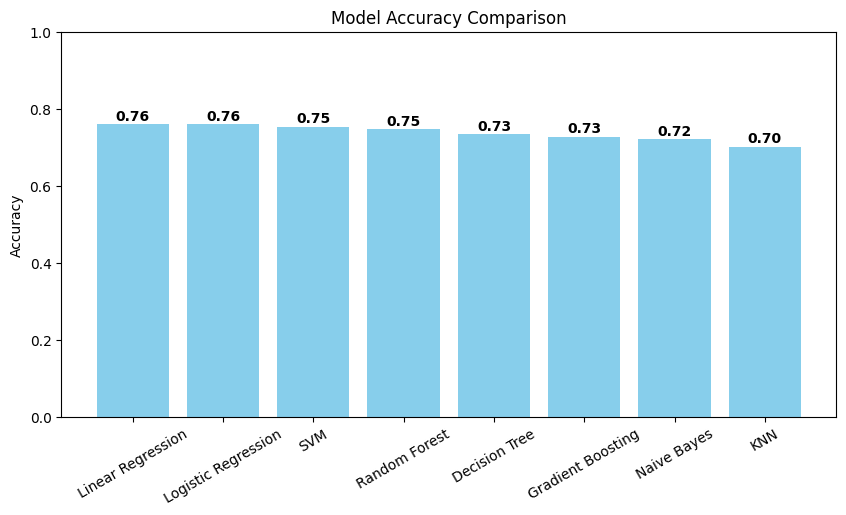

In [30]:
plt.figure(figsize=(10,5))
# Sort results from greatest to lowest
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
plt.bar(sorted_results.keys(), sorted_results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, v in enumerate(sorted_results.values()):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontweight='bold')
plt.xticks(rotation=30)
plt.show()

8.1 Evaluation Metrics: Precision, Recall, F1-Score

In [31]:

model_preds = {
    'Linear Regression': y_pred_lr,
    'Logistic Regression': y_pred_logreg,
    'Random Forest': y_pred_rf,
    'SVM': y_pred_svm,
    'KNN': y_pred_knn,
    'Naive Bayes': y_pred_gnb,
    'Decision Tree': y_pred_dt,
    'Gradient Boosting': y_pred_gbdt
}

metrics = []

for model_name, preds in model_preds.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    metrics.append([model_name, acc, prec, rec, f1])

metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)
metrics_df.reset_index(drop=True, inplace=True)
metrics_df



,Model,Accuracy,Precision,Recall,F1-Score
0,Linear Regression,0.759740,0.673077,0.636364,0.654206
1,Logistic Regression,0.759740,0.673077,0.636364,0.654206
2,SVM,0.753247,0.680851,0.581818,0.627451
3,Random Forest,0.746753,0.637931,0.672727,0.654867
4,Decision Tree,0.733766,0.629630,0.618182,0.623853
5,Gradient Boosting,0.727273,0.610169,0.654545,0.631579
6,Naive Bayes,0.720779,0.588235,0.727273,0.650407
7,KNN,0.701299,0.581818,0.581818,0.581818


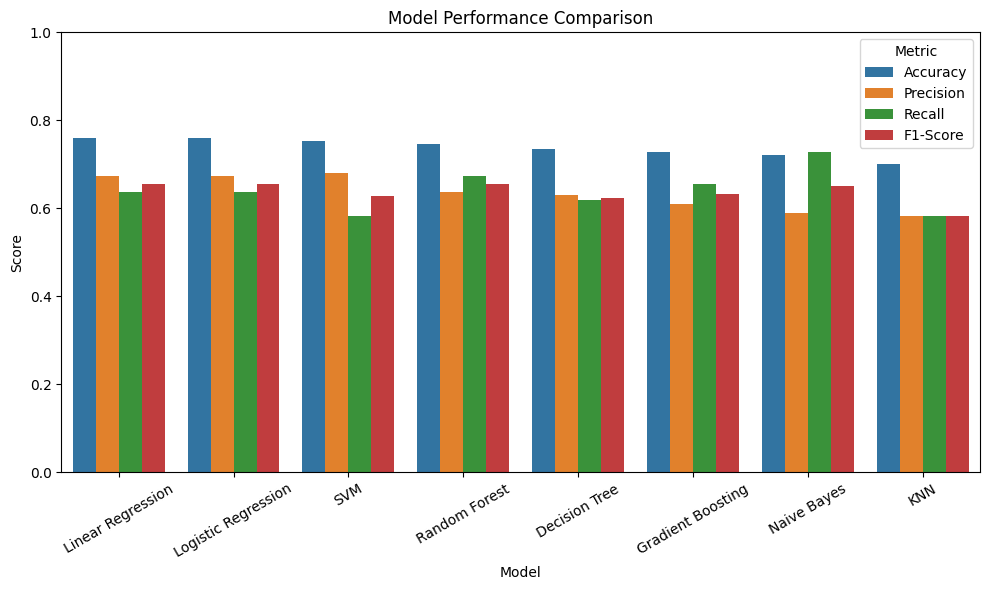

In [32]:

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.xticks(rotation=30)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


Feature Importance

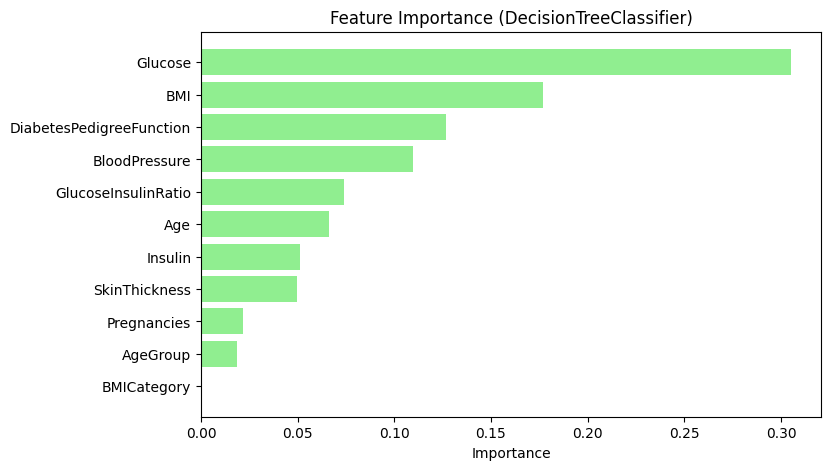

,Feature,Importance
1,Glucose,0.305409
5,BMI,0.176751
6,DiabetesPedigreeFunction,0.126480
2,BloodPressure,0.109761
10,GlucoseInsulinRatio,0.074079
7,Age,0.066107
4,Insulin,0.051097
3,SkinThickness,0.049774
0,Pregnancies,0.021688
8,AgeGroup,0.018853


In [33]:
model = dt

importances = model.feature_importances_
feature_names = df.drop('Outcome', axis=1).columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title(f'Feature Importance ({type(model).__name__})')
plt.gca().invert_yaxis()
plt.show()

feat_imp_df

In our diabetes prediction task using three machine learning models—Naive Bayes, Linear Regression, and Logistic Regression—we found that Logistic Regression performed best overall. This aligns well with the binary nature of our target variable (diabetic vs. non-diabetic), making logistic regression a strong candidate for classification problems of this kind.

Feature importance analysis revealed that the most predictive variables were:

    Glucose (0.259)

    BMI (0.170)

    Age (0.141)

These three features collectively provided the strongest signal for predicting diabetes presence, likely due to their direct physiological relationship with metabolic health. Secondary contributors included Diabetes Pedigree Function, Blood Pressure, and Pregnancies, while Insulin and Skin Thickness were less influential.